In [1]:
import sys
sys.path.append('..')

import pandas as pd
import numpy as np
import seaborn as sns
import re
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
%load_ext autoreload
%autoreload 2
from scipy.stats import uniform

from chapters.chapter8 import *

In [2]:
n = 50
theta = 1
obs = uniform.rvs(0, theta, size=n)
statistic = np.max
statistic(obs)

0.99753954515285248

In [3]:
iters = 10000
df_true = pd.DataFrame({'value': [statistic(uniform.rvs(0, theta, size=n)) for _ in range(iters)]})
df_true['estimator'] = 'max'
df_true.head()

,value,estimator
0,0.975795,max
1,0.984798,max
2,0.993684,max
3,0.964729,max
4,0.989351,max


In [4]:
df_boot = pd.DataFrame({'value': list(bootstrap(pd.Series(obs), statistic, iters))})
df_boot['estimator'] = 'max bootstrap'
df_boot.head()

,value,estimator
0,0.997540,max bootstrap
1,0.990897,max bootstrap
2,0.990897,max bootstrap
3,0.997540,max bootstrap
4,0.997540,max bootstrap


In [5]:
df = pd.concat((df_true, df_boot))
df.head()

,value,estimator
0,0.975795,max
1,0.984798,max
2,0.993684,max
3,0.964729,max
4,0.989351,max


In [6]:
df.groupby('estimator').count()

,value
estimator,
max,10000
max bootstrap,10000


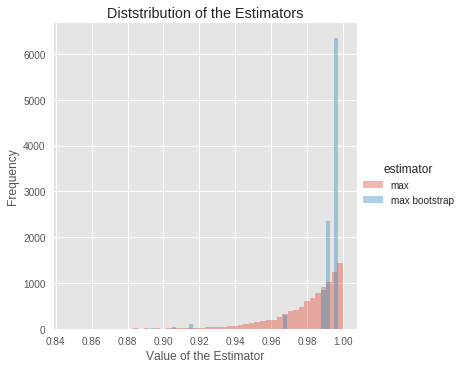

In [8]:
g = sns.FacetGrid(df, hue='estimator', size=5)
g.map(sns.distplot, 'value', kde=False).add_legend()
g.set(xlabel='Value of the Estimator', ylabel='Frequency', title='Diststribution of the Estimators')
g.savefig('../images/ch08q07_histogram_true_vs_bootstrap.svg')